# Energy Consumption Analysis
https://www.kaggle.com/robikscube/hourly-energy-consumption#DEOK_hourly.csv

Analysis completed by Megan Gray.

Unit 11 - Web Assignment for Data Anayltics Boot Camp

In [1]:
#import tools and set up files.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# CSV files to load
AEP = "Data/AEP_hourly.csv"
COMED = "Data/COMED_hourly.csv"
DAYTON = "Data/DAYTON_hourly.csv"
DEOK = "Data/DEOK_hourly.csv"

# Read the data files
AEP_data = pd.read_csv(AEP)
COMED_data = pd.read_csv(COMED)
DAYTON_data = pd.read_csv(DAYTON)
DEOK_data = pd.read_csv(DEOK)

### Exploratory Analysis

Review each csv file

In [2]:
AEP_data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
COMED_data.head()

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0


In [4]:
DAYTON_data.head()

,Datetime,DAYTON_MW
0,2004-12-31 01:00:00,1596.0
1,2004-12-31 02:00:00,1517.0
2,2004-12-31 03:00:00,1486.0
3,2004-12-31 04:00:00,1469.0
4,2004-12-31 05:00:00,1472.0


In [5]:
DEOK_data.head()

,Datetime,DEOK_MW
0,2012-12-31 01:00:00,2945.0
1,2012-12-31 02:00:00,2868.0
2,2012-12-31 03:00:00,2812.0
3,2012-12-31 04:00:00,2812.0
4,2012-12-31 05:00:00,2860.0


##### Combine all CSV files into one Pandas Dataframe

In [6]:
DEOK_COMED = pd.merge(DEOK_data, COMED_data, on=["Datetime","Datetime"])
DEOK_COMED.head()

,Datetime,DEOK_MW,COMED_MW
0,2012-12-31 01:00:00,2945.0,10445.0
1,2012-12-31 02:00:00,2868.0,9897.0
2,2012-12-31 03:00:00,2812.0,9538.0
3,2012-12-31 04:00:00,2812.0,9333.0
4,2012-12-31 05:00:00,2860.0,9275.0


In [7]:
DEOK_COMED_DAYTON = pd.merge(DEOK_COMED, DAYTON_data, on=["Datetime","Datetime"])
DEOK_COMED_DAYTON.head()

,Datetime,DEOK_MW,COMED_MW,DAYTON_MW
0,2012-12-31 01:00:00,2945.0,10445.0,1824.0
1,2012-12-31 02:00:00,2868.0,9897.0,1771.0
2,2012-12-31 03:00:00,2812.0,9538.0,1760.0
3,2012-12-31 04:00:00,2812.0,9333.0,1734.0
4,2012-12-31 05:00:00,2860.0,9275.0,1757.0


In [8]:
DEOK_COMED_DAYTON_AEP = pd.merge(DEOK_COMED_DAYTON, AEP_data, on=["Datetime","Datetime"])

In [9]:
DEOK_COMED_DAYTON_AEP.head()

,Datetime,DEOK_MW,COMED_MW,DAYTON_MW,AEP_MW
0,2012-12-31 01:00:00,2945.0,10445.0,1824.0,15935.0
1,2012-12-31 02:00:00,2868.0,9897.0,1771.0,15645.0
2,2012-12-31 03:00:00,2812.0,9538.0,1760.0,15613.0
3,2012-12-31 04:00:00,2812.0,9333.0,1734.0,15618.0
4,2012-12-31 05:00:00,2860.0,9275.0,1757.0,15760.0


Create new dataframe to complete analysis work on.

In [10]:
test = DEOK_COMED_DAYTON_AEP

In [11]:
test.head()

,Datetime,DEOK_MW,COMED_MW,DAYTON_MW,AEP_MW
0,2012-12-31 01:00:00,2945.0,10445.0,1824.0,15935.0
1,2012-12-31 02:00:00,2868.0,9897.0,1771.0,15645.0
2,2012-12-31 03:00:00,2812.0,9538.0,1760.0,15613.0
3,2012-12-31 04:00:00,2812.0,9333.0,1734.0,15618.0
4,2012-12-31 05:00:00,2860.0,9275.0,1757.0,15760.0


##### Megawatt values vary between power plants. Need to equalize the data so that we can compare side by side at the start date. Create code to have values start at 0 for each column.

In [12]:
test['DEOK_MW'] = test['DEOK_MW']-2945.0
test['COMED_MW'] = test['COMED_MW']-10445.0
test['DAYTON_MW'] = test['DAYTON_MW']-1824.0
test['AEP_MW'] = test['AEP_MW']-15935.0

In [13]:
test.dtypes

Datetime      object
DEOK_MW      float64
COMED_MW     float64
DAYTON_MW    float64
AEP_MW       float64
dtype: object

##### Dataframe initially has Datetime as an 'object' instead of 'datetime64(ns)'. Need to convert to 'datetime64' in order to plot in dataframe properly

In [14]:
test['Datetime'] =  pd.to_datetime(test['Datetime'])

In [15]:
test.dtypes

Datetime     datetime64[ns]
DEOK_MW             float64
COMED_MW            float64
DAYTON_MW           float64
AEP_MW              float64
dtype: object

### Break down dataset by year: 2013, 2014, 2015, 2016, 2017, then by date.

In [16]:
# Extract all data within year 2013.
test_2013 = test[test['Datetime'].dt.year == 2013]

In [17]:
# Extract all data within year 2014.
test_2014 = test[test['Datetime'].dt.year == 2014]

In [18]:
# Extract all data within year 2015.
test_2015 = test[test['Datetime'].dt.year == 2015]

In [19]:
# Extract all data within year 2016.
test_2016 = test[test['Datetime'].dt.year == 2016]

In [20]:
# Extract all data within year 2017.
test_2017 = test[test['Datetime'].dt.year == 2017]

In [21]:
test_2017.sort_values(by='Datetime').head()

,Datetime,DEOK_MW,COMED_MW,DAYTON_MW,AEP_MW
35109,2017-01-01 00:00:00,-255.0,55.0,-129.0,-2695.0
52634,2017-01-01 01:00:00,-356.0,-248.0,-180.0,-3059.0
52635,2017-01-01 02:00:00,-390.0,-552.0,-216.0,-3344.0
52636,2017-01-01 03:00:00,-428.0,-791.0,-240.0,-3448.0
52637,2017-01-01 04:00:00,-443.0,-1008.0,-254.0,-3566.0


##### Set the index for each Pandas dataframe to the 'Datetime' column.

In [22]:
df_2013 = test_2013.set_index('Datetime')
df_2014 = test_2014.set_index('Datetime')
df_2015 = test_2015.set_index('Datetime')
df_2016 = test_2016.set_index('Datetime')
df_2017 = test_2017.set_index('Datetime')

##### Group by date for each dataframe and do an average per date in order to calculate an average value per day for each power plant.

In [23]:
df_2013_grouped = df_2013.groupby(pd.Grouper(freq='d')).mean()
df_2013_grouped.head()

,DEOK_MW,COMED_MW,DAYTON_MW,AEP_MW
Datetime,,,,
2013-01-01,10.458333,151.875000,33.375000,-799.083333
2013-01-02,409.291667,1764.333333,437.500000,1562.583333
2013-01-03,499.625000,1983.500000,513.291667,2171.250000
2013-01-04,318.791667,1949.750000,398.333333,1947.583333
2013-01-05,149.958333,838.416667,206.125000,444.958333


In [24]:
df_2014_grouped = df_2014.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df_2014_grouped.head()

,DEOK_MW,COMED_MW,DAYTON_MW,AEP_MW
Datetime,,,,
2014-01-01,20.666667,968.583333,84.708333,-422.416667
2014-01-02,474.500000,2199.083333,487.208333,1800.750000
2014-01-03,911.833333,2944.291667,707.333333,3858.416667
2014-01-04,491.208333,1788.125000,404.500000,2132.250000
2014-01-05,160.625000,1539.083333,144.083333,-105.583333


In [25]:
df_2015_grouped = df_2015.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df_2015_grouped.head()

,DEOK_MW,COMED_MW,DAYTON_MW,AEP_MW
Datetime,,,,
2015-01-01,200.833333,489.791667,140.791667,50.250000
2015-01-02,170.750000,762.250000,123.625000,-419.208333
2015-01-03,-63.250000,353.083333,12.041667,-1236.750000
2015-01-04,-193.541667,384.875000,-62.666667,-2300.125000
2015-01-05,735.000000,3013.625000,646.916667,1875.083333


In [26]:
df_2016_grouped = df_2016.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df_2016_grouped.head()

,DEOK_MW,COMED_MW,DAYTON_MW,AEP_MW
Datetime,,,,
2016-01-01,-96.708333,30.666667,24.458333,-1849.416667
2016-01-02,-30.833333,-22.791667,43.041667,-1450.916667
2016-01-03,15.916667,114.208333,70.833333,-1313.416667
2016-01-04,318.583333,1301.125000,390.000000,931.333333
2016-01-05,534.791667,1514.333333,507.500000,2013.458333


In [27]:
df_2017_grouped = df_2017.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df_2017_grouped.head()

,DEOK_MW,COMED_MW,DAYTON_MW,AEP_MW
Datetime,,,,
2017-01-01,-200.666667,-590.541667,-109.750000,-2862.250000
2017-01-02,-223.416667,-210.625000,-58.625000,-2456.416667
2017-01-03,-122.458333,726.625000,90.666667,-1478.333333
2017-01-04,343.750000,2081.083333,398.250000,-293.041667
2017-01-05,720.791667,2708.250000,644.333333,2170.375000


##### Convert final Pandas Dataframe of Power consumption to HTML table file.

In [78]:
# output the file to .html file in folder
df_2013_grouped.to_html('Data/2013_table.html')
df_2014_grouped.to_html('Data/2014_table.html')
df_2015_grouped.to_html('Data/2015_table.html')
df_2016_grouped.to_html('Data/2016_table.html')
df_2017_grouped.to_html('Data/2017_table.html')

In [29]:
# this command will open the table.html in browser for some users.
!open table.html

### Plot comparisons between each power plant for each year

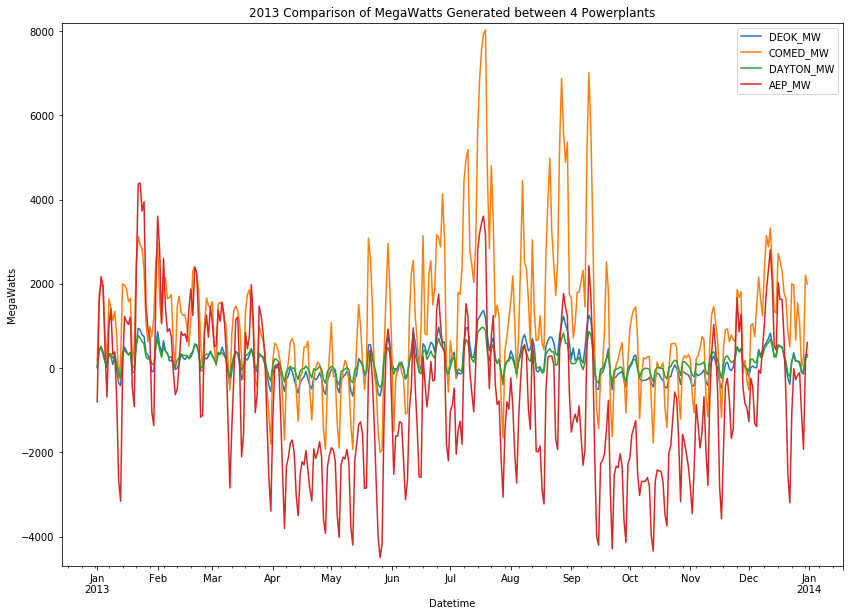

In [70]:
df_2013_grouped.plot(figsize=(14,10), ylim=(-4700,8200))
plt.title('2013 Comparison of MegaWatts Generated between 4 Powerplants')
plt.ylabel("MegaWatts")
plt.savefig('Images/2013.png')

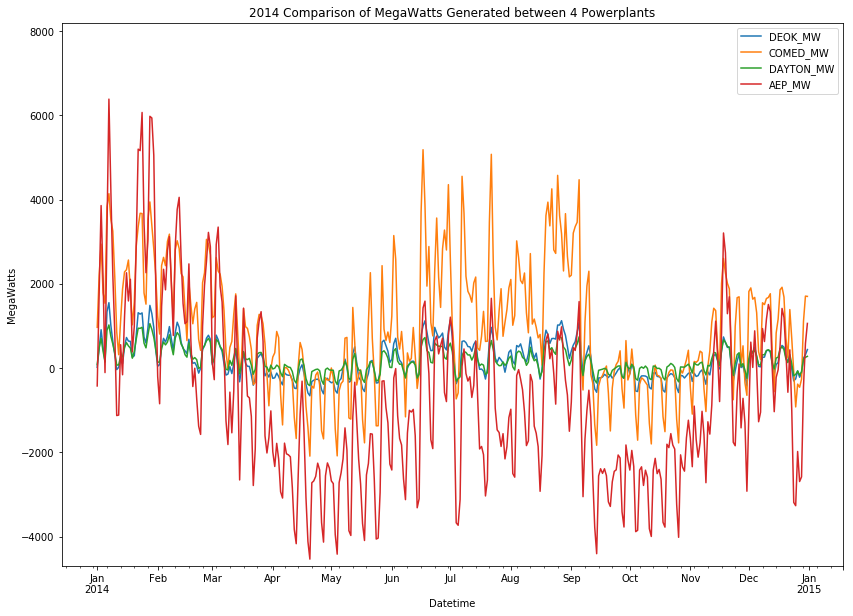

In [71]:
df_2014_grouped.plot(figsize=(14,10), ylim=(-4700,8200))
plt.title('2014 Comparison of MegaWatts Generated between 4 Powerplants')
plt.ylabel("MegaWatts")
plt.savefig('Images/2014.png')

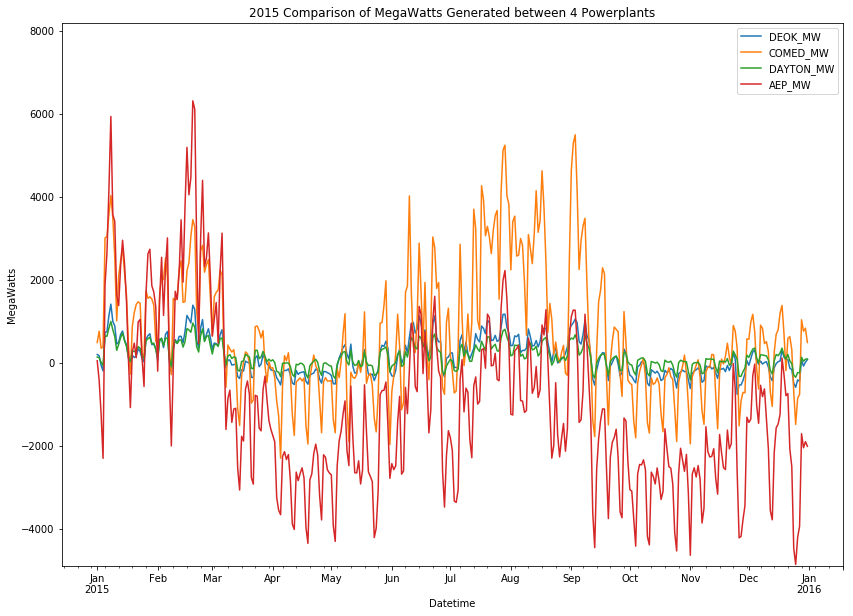

In [74]:
df_2015_grouped.plot(figsize=(14,10), ylim=(-4900,8200))
plt.title('2015 Comparison of MegaWatts Generated between 4 Powerplants')
plt.ylabel("MegaWatts")
plt.savefig('Images/2015.png')

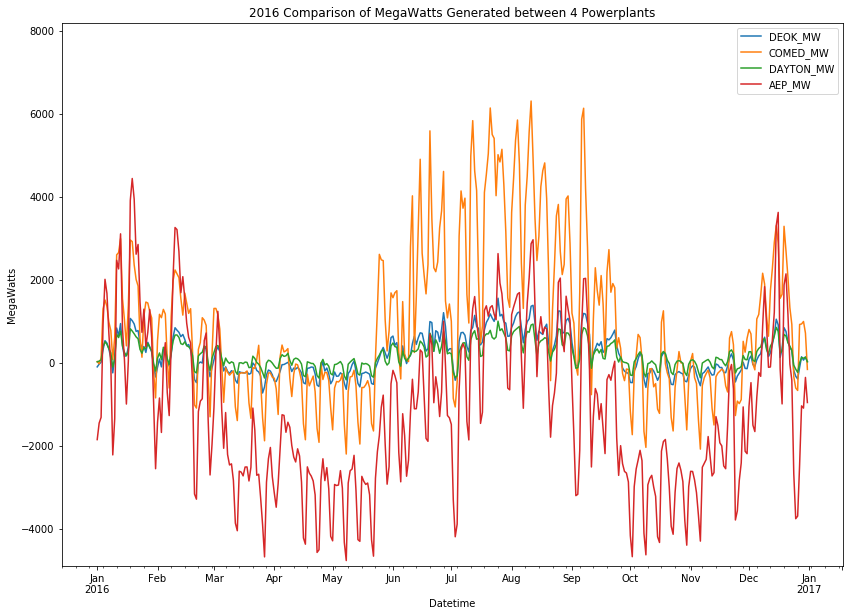

In [76]:
df_2016_grouped.plot(figsize=(14,10), ylim=(-4900,8200))
plt.title('2016 Comparison of MegaWatts Generated between 4 Powerplants')
plt.ylabel("MegaWatts")
plt.savefig('Images/2016.png')

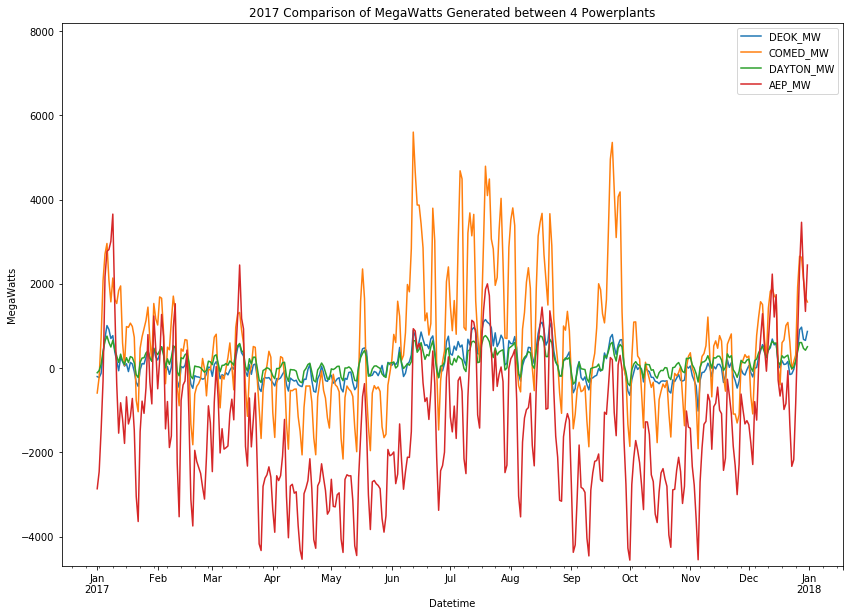

In [77]:
df_2017_grouped.plot(figsize=(14,10), ylim=(-4700,8200))
plt.title('2017 Comparison of MegaWatts Generated between 4 Powerplants')
plt.ylabel("MegaWatts")
plt.savefig('Images/2017.png')

##### Plot out the individual yearly consumption data for DEOK.

In [35]:
# extract DEOK data from dataframe into individual series in order to plot.
DEOK_all_2013 = df_2013_grouped['DEOK_MW']
DEOK_all_2014 = df_2014_grouped['DEOK_MW']
DEOK_all_2015 = df_2015_grouped['DEOK_MW']
DEOK_all_2016 = df_2016_grouped['DEOK_MW']
DEOK_all_2017 = df_2017_grouped['DEOK_MW']
DEOK_all_2013.head()

Datetime
2013-01-01     10.458333
2013-01-02    409.291667
2013-01-03    499.625000
2013-01-04    318.791667
2013-01-05    149.958333
Freq: D, Name: DEOK_MW, dtype: float64

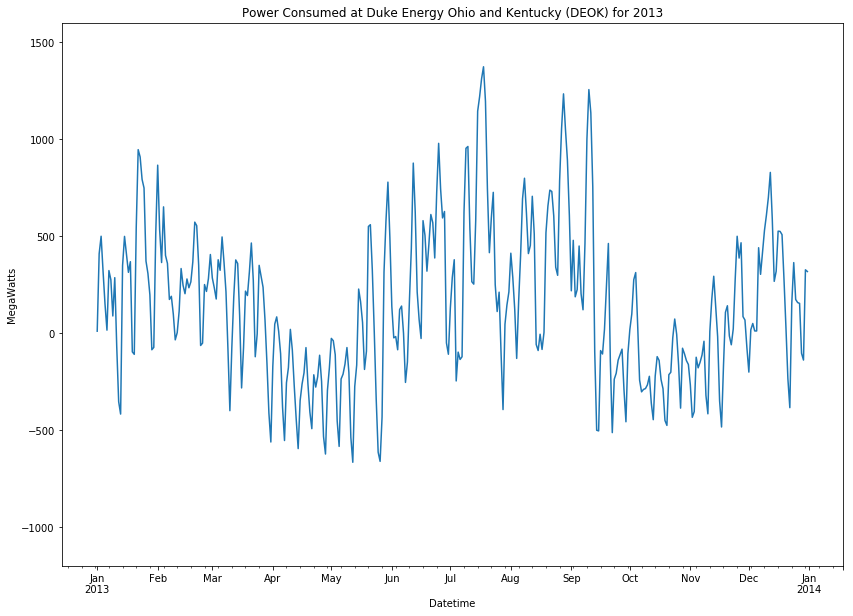

In [64]:
DEOK_all_2013.plot(figsize=(14,10), ylim=(-1200,1600))
plt.title('Power Consumed at Duke Energy Ohio and Kentucky (DEOK) for 2013')
plt.ylabel("MegaWatts")
plt.savefig('Images/DEOK_2013.png')

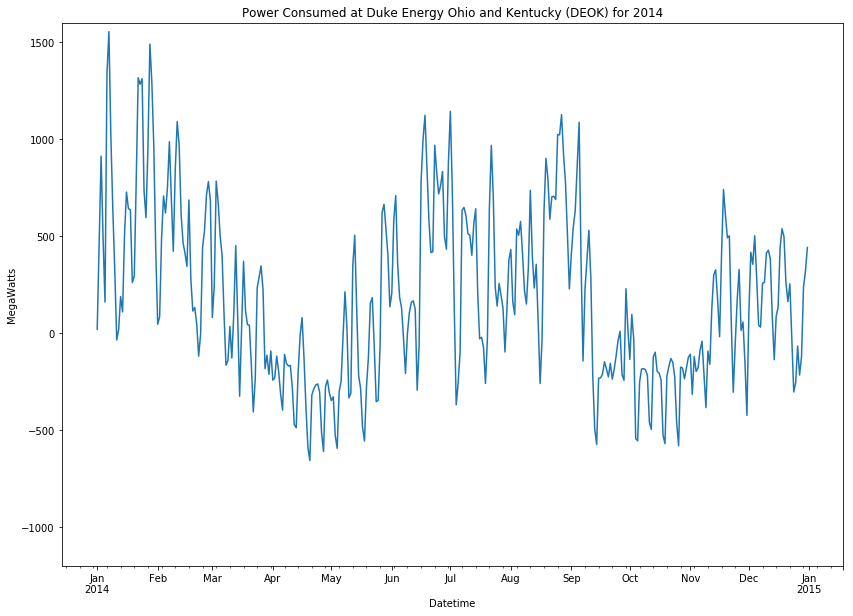

In [65]:
DEOK_all_2014.plot(figsize=(14,10), ylim=(-1200,1600))
plt.title('Power Consumed at Duke Energy Ohio and Kentucky (DEOK) for 2014')
plt.ylabel("MegaWatts")
plt.savefig('Images/DEOK_2014.png')

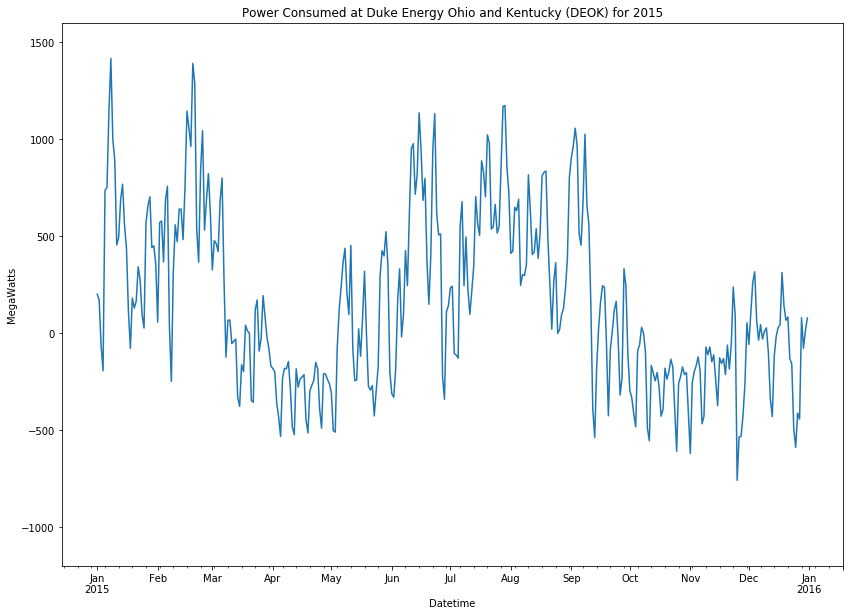

In [66]:
DEOK_all_2015.plot(figsize=(14,10), ylim=(-1200,1600))
plt.title('Power Consumed at Duke Energy Ohio and Kentucky (DEOK) for 2015')
plt.ylabel("MegaWatts")
plt.savefig('Images/DEOK_2015.png')

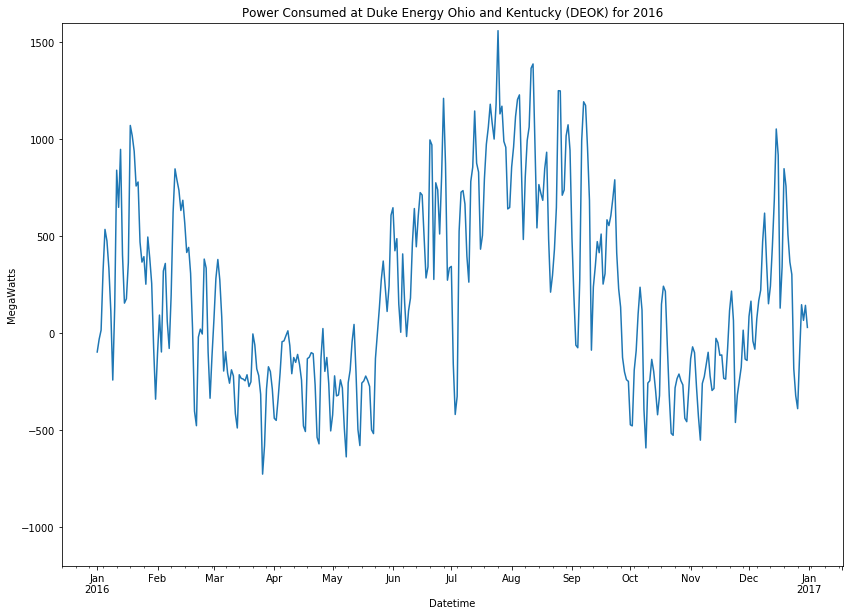

In [67]:
DEOK_all_2016.plot(figsize=(14,10), ylim=(-1200,1600))
plt.title('Power Consumed at Duke Energy Ohio and Kentucky (DEOK) for 2016')
plt.ylabel("MegaWatts")
plt.savefig('Images/DEOK_2016.png')

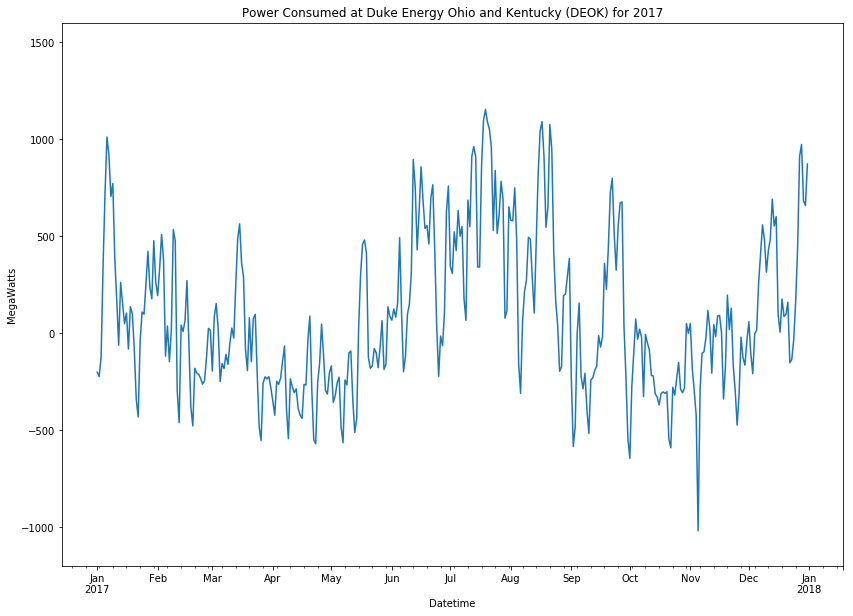

In [68]:
DEOK_all_2017.plot(figsize=(14,10), ylim=(-1200,1600))
plt.title('Power Consumed at Duke Energy Ohio and Kentucky (DEOK) for 2017')
plt.ylabel("MegaWatts")
plt.savefig('Images/DEOK_2017.png')

### Plot out the individual yearly consumption data for AEP.

In [41]:
# extract DEOK data from dataframe into individual series in order to plot.
AEP_all_2013 = df_2013_grouped['AEP_MW']
AEP_all_2014 = df_2014_grouped['AEP_MW']
AEP_all_2015 = df_2015_grouped['AEP_MW']
AEP_all_2016 = df_2016_grouped['AEP_MW']
AEP_all_2017 = df_2017_grouped['AEP_MW']
AEP_all_2013.head()

Datetime
2013-01-01    -799.083333
2013-01-02    1562.583333
2013-01-03    2171.250000
2013-01-04    1947.583333
2013-01-05     444.958333
Freq: D, Name: AEP_MW, dtype: float64

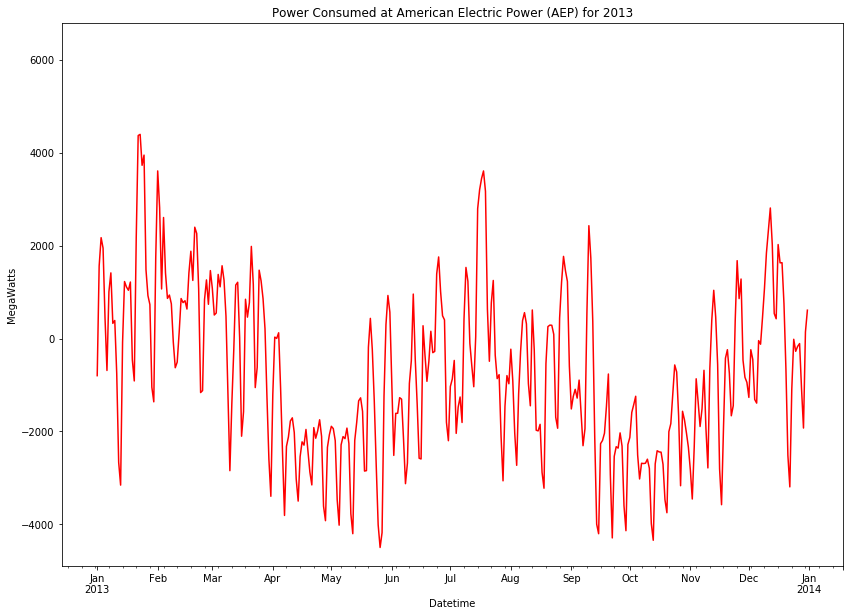

In [42]:
AEP_all_2013.plot(figsize=(14,10), color='r', ylim=(-4900,6800))
plt.title('Power Consumed at American Electric Power (AEP) for 2013')
plt.ylabel("MegaWatts")
plt.savefig('Images/AEP_2013.png')

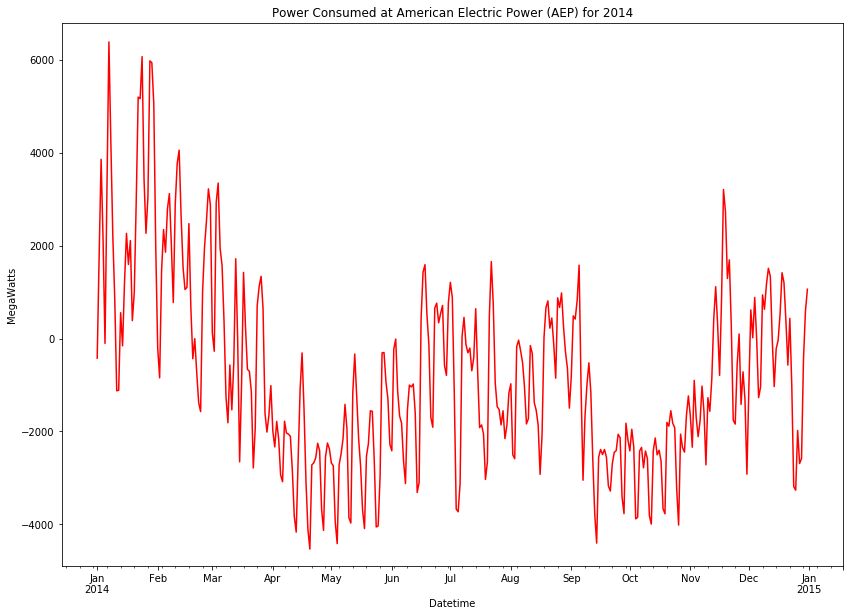

In [43]:
AEP_all_2014.plot(figsize=(14,10), color='r', ylim=(-4900,6800))
plt.title('Power Consumed at American Electric Power (AEP) for 2014')
plt.ylabel("MegaWatts")
plt.savefig('Images/AEP_2014.png')

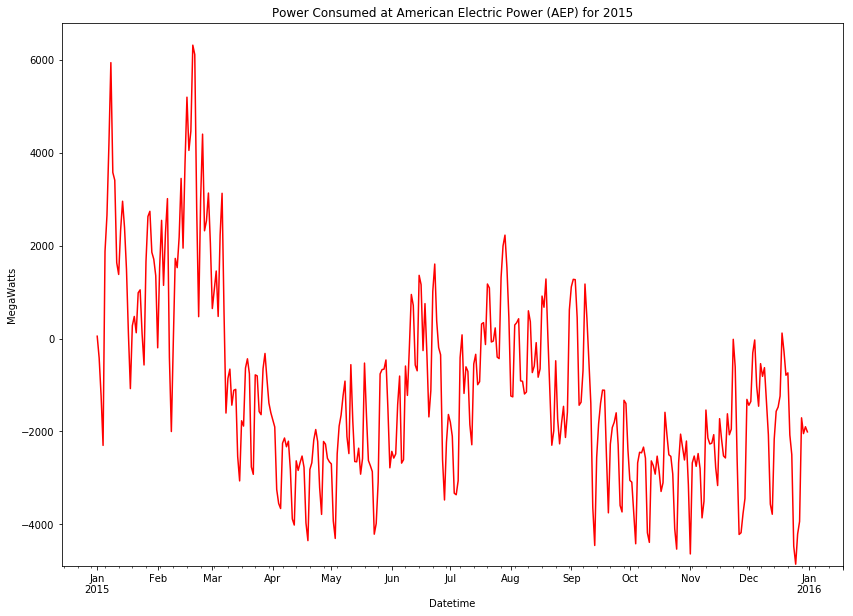

In [44]:
AEP_all_2015.plot(figsize=(14,10), color='r', ylim=(-4900,6800))
plt.title('Power Consumed at American Electric Power (AEP) for 2015')
plt.ylabel("MegaWatts")
plt.savefig('Images/AEP_2015.png')

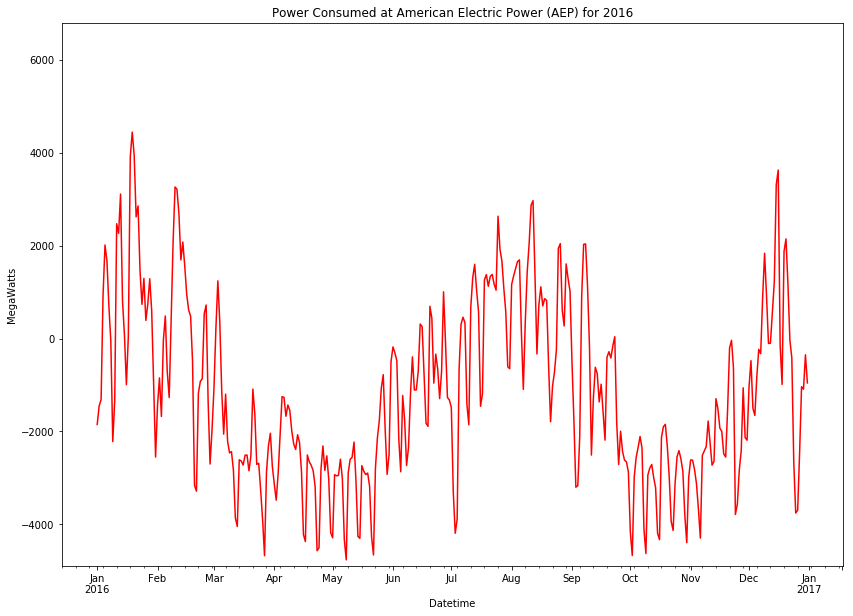

In [45]:
AEP_all_2016.plot(figsize=(14,10), color='r', ylim=(-4900,6800))
plt.title('Power Consumed at American Electric Power (AEP) for 2016')
plt.ylabel("MegaWatts")
plt.savefig('Images/AEP_2016.png')

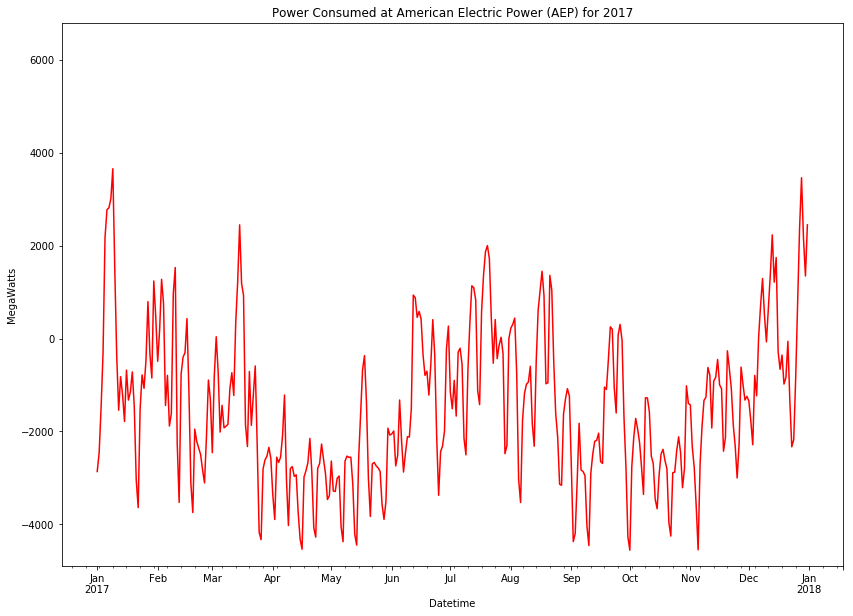

In [46]:
AEP_all_2017.plot(figsize=(14,10), color='r', ylim=(-4900,6800))
plt.title('Power Consumed at American Electric Power (AEP) for 2017')
plt.ylabel("MegaWatts")
plt.savefig('Images/AEP_2017.png')

### Plot out the individual yearly consumption data for COMED

In [47]:
# extract COMED data from dataframe into individual series in order to plot.
COMED_all_2013 = df_2013_grouped['COMED_MW']
COMED_all_2014 = df_2014_grouped['COMED_MW']
COMED_all_2015 = df_2015_grouped['COMED_MW']
COMED_all_2016 = df_2016_grouped['COMED_MW']
COMED_all_2017 = df_2017_grouped['COMED_MW']
COMED_all_2013.head()

Datetime
2013-01-01     151.875000
2013-01-02    1764.333333
2013-01-03    1983.500000
2013-01-04    1949.750000
2013-01-05     838.416667
Freq: D, Name: COMED_MW, dtype: float64

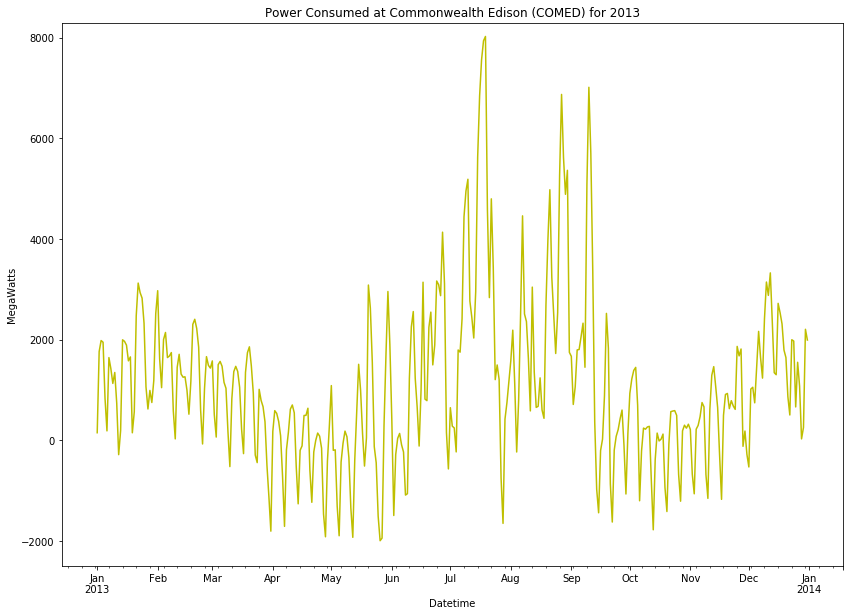

In [48]:
COMED_all_2013.plot(figsize=(14,10), color='y', ylim=(-2500,8300))
plt.title('Power Consumed at Commonwealth Edison (COMED) for 2013')
plt.ylabel("MegaWatts")
plt.savefig('Images/COMED_2013.png')

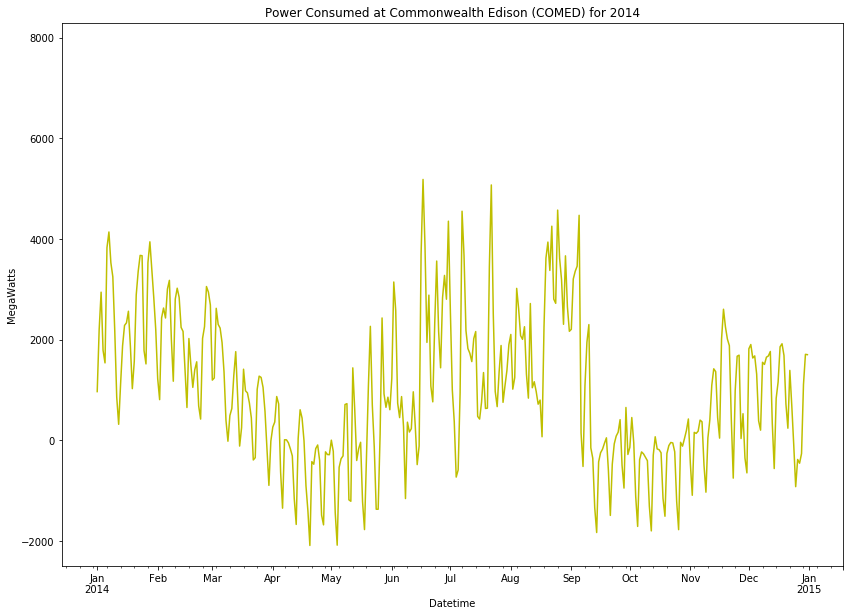

In [49]:
COMED_all_2014.plot(figsize=(14,10), color='y', ylim=(-2500,8300))
plt.title('Power Consumed at Commonwealth Edison (COMED) for 2014')
plt.ylabel("MegaWatts")
plt.savefig('Images/COMED_2014.png')

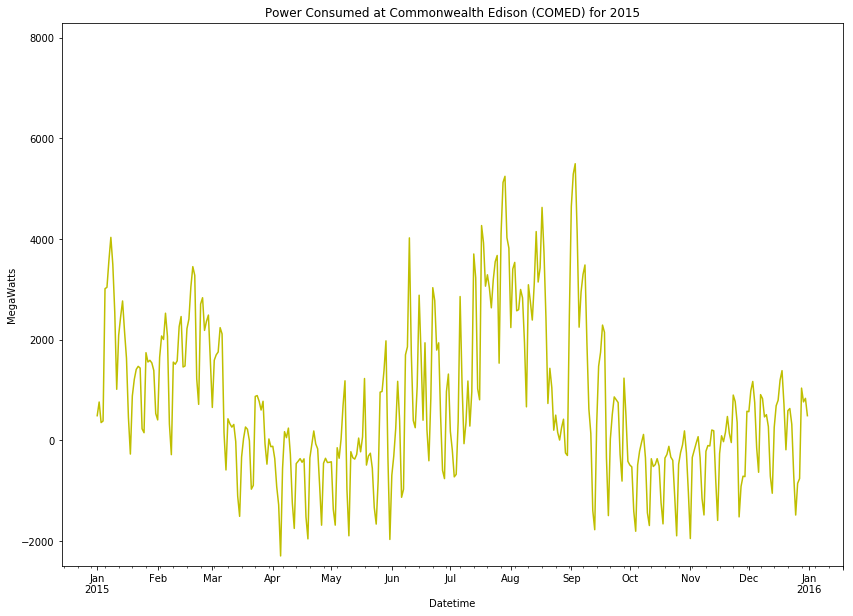

In [50]:
COMED_all_2015.plot(figsize=(14,10), color='y', ylim=(-2500,8300))
plt.title('Power Consumed at Commonwealth Edison (COMED) for 2015')
plt.ylabel("MegaWatts")
plt.savefig('Images/COMED_2015.png')

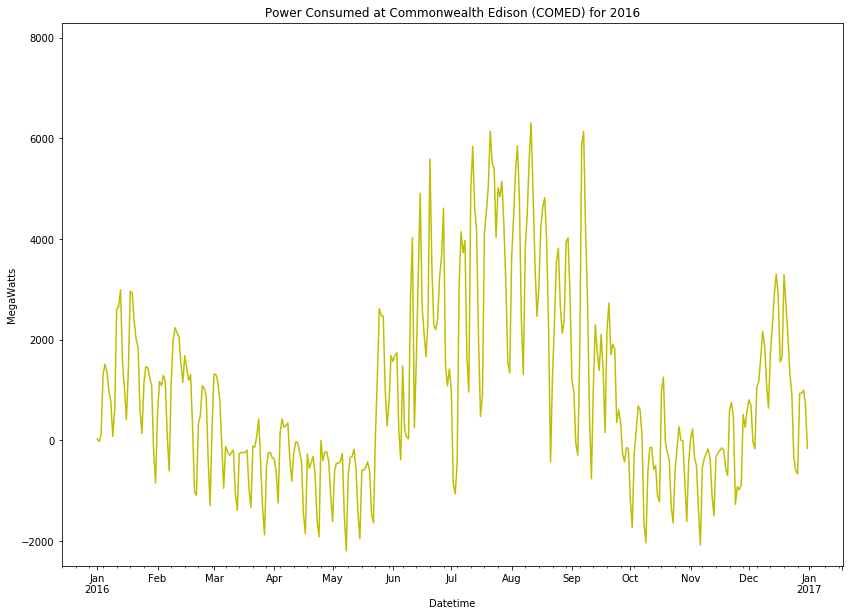

In [51]:
COMED_all_2016.plot(figsize=(14,10), color='y', ylim=(-2500,8300))
plt.title('Power Consumed at Commonwealth Edison (COMED) for 2016')
plt.ylabel("MegaWatts")
plt.savefig('Images/COMED_2016.png')

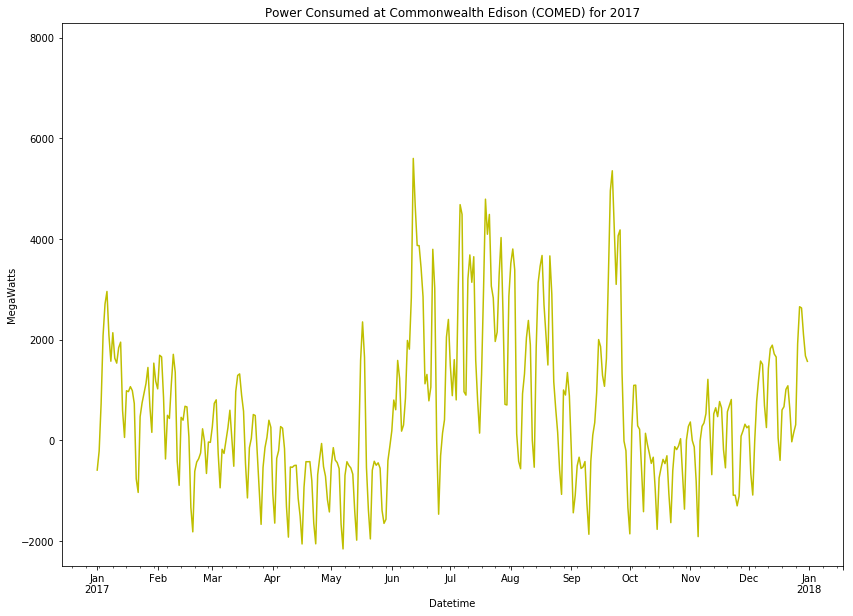

In [52]:
COMED_all_2017.plot(figsize=(14,10), color='y', ylim=(-2500,8300))
plt.title('Power Consumed at Commonwealth Edison (COMED) for 2017')
plt.ylabel("MegaWatts")
plt.savefig('Images/COMED_2017.png')

### Plot out the individual yearly consumption data for DAYTON

In [53]:
# extract DAYTON data from dataframe into individual series in order to plot.
DAYTON_all_2013 = df_2013_grouped['DAYTON_MW']
DAYTON_all_2014 = df_2014_grouped['DAYTON_MW']
DAYTON_all_2015 = df_2015_grouped['DAYTON_MW']
DAYTON_all_2016 = df_2016_grouped['DAYTON_MW']
DAYTON_all_2017 = df_2017_grouped['DAYTON_MW']
DAYTON_all_2013.head()

Datetime
2013-01-01     33.375000
2013-01-02    437.500000
2013-01-03    513.291667
2013-01-04    398.333333
2013-01-05    206.125000
Freq: D, Name: DAYTON_MW, dtype: float64

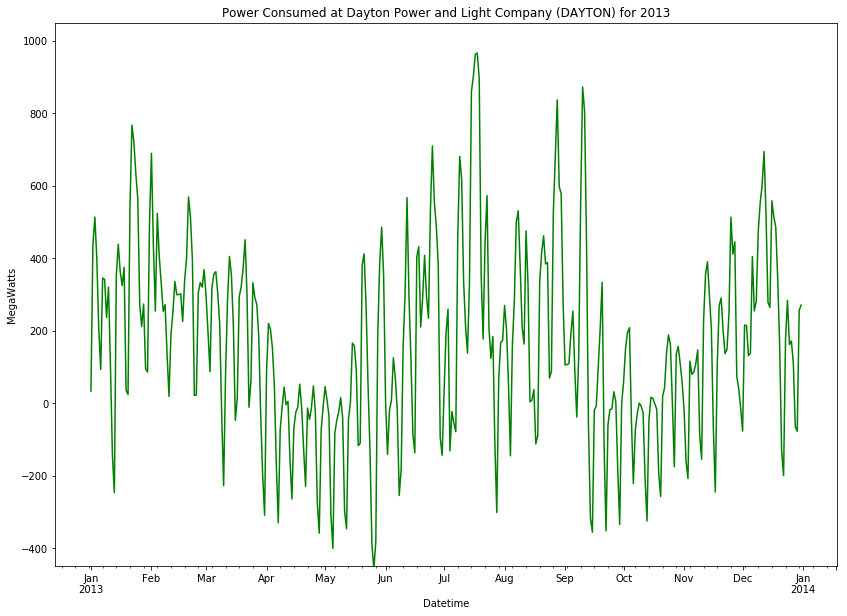

In [54]:
DAYTON_all_2013.plot(figsize=(14,10), color='g',  ylim=(-450,1050))
plt.title('Power Consumed at Dayton Power and Light Company (DAYTON) for 2013')
plt.ylabel("MegaWatts")
plt.savefig('Images/DAYTON_2013.png')

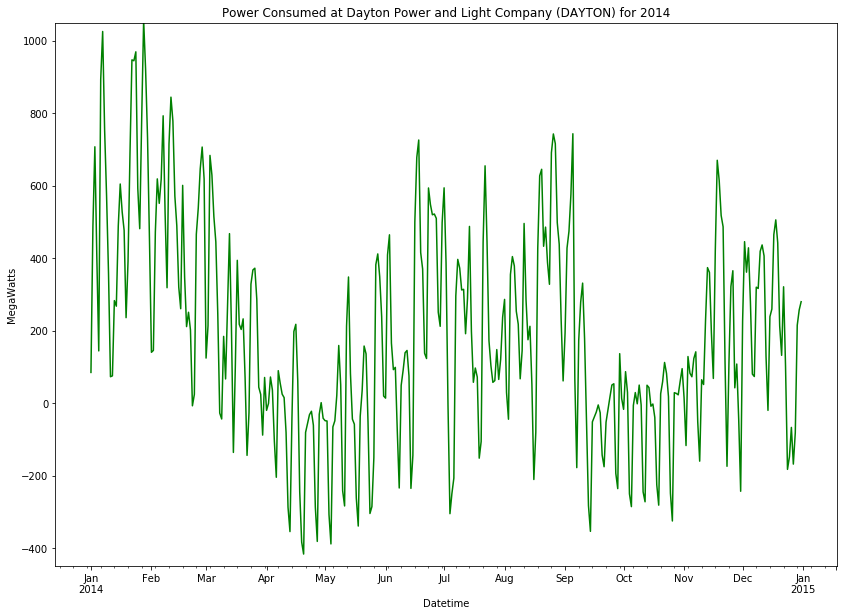

In [55]:
DAYTON_all_2014.plot(figsize=(14,10), color='g', ylim=(-450,1050))
plt.title('Power Consumed at Dayton Power and Light Company (DAYTON) for 2014')
plt.ylabel("MegaWatts")
plt.savefig('Images/DAYTON_2014.png')

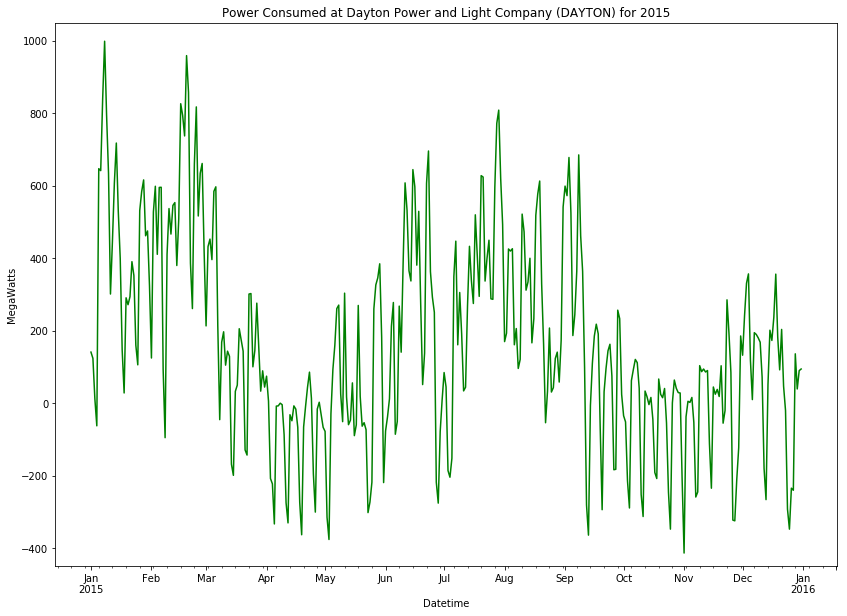

In [56]:
DAYTON_all_2015.plot(figsize=(14,10), color='g',  ylim=(-450,1050))
plt.title('Power Consumed at Dayton Power and Light Company (DAYTON) for 2015')
plt.ylabel("MegaWatts")
plt.savefig('Images/DAYTON_2015.png')

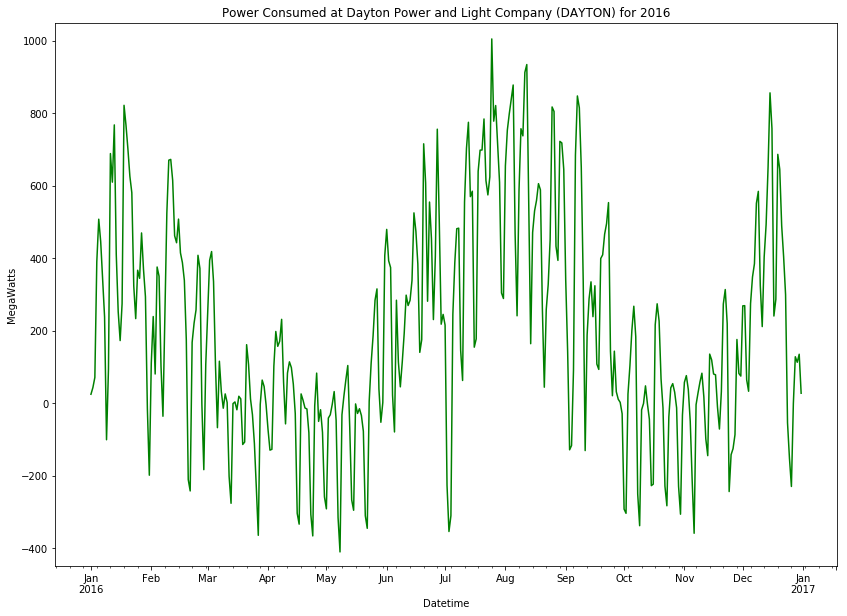

In [57]:
DAYTON_all_2016.plot(figsize=(14,10), color='g', ylim=(-450,1050))
plt.title('Power Consumed at Dayton Power and Light Company (DAYTON) for 2016')
plt.ylabel("MegaWatts")
plt.savefig('Images/DAYTON_2016.png')

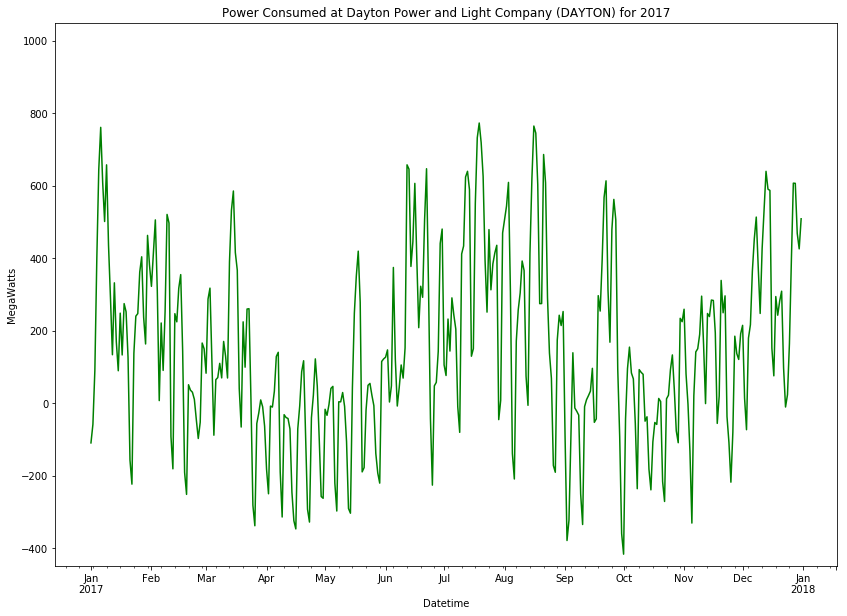

In [58]:
DAYTON_all_2017.plot(figsize=(14,10), color='g', ylim=(-450,1050))
plt.title('Power Consumed at Dayton Power and Light Company (DAYTON) for 2017')
plt.ylabel("MegaWatts")
plt.savefig('Images/DAYTON_2017.png')

## IN PROGRESS CODE - NOT USED FOR WEB ASSIGNMENT YET.

take grouped table and extract out month and date into separate columns. Then concatenate month-date into final column and reset or set index to date column.

2013 Data Manipulation for all 4 power plants

In [ ]:
# copy original table to new table
Power_2013 = test_2013

# create 2 new columns with the month and day extracted from column 'Datetime'
Power_2013['month'], Power_2013['day'] = Power_2013['Datetime'].dt.month, Power_2013['Datetime'].dt.day

# 'Datetime' shows entrys for each hour of every day. We need to create an average per day value so we need to set the
# index to 'Datetime' so that we can complete a groupby and an average in the next step.
Power_2013_index = Power_2013.set_index('Datetime')
Power_2013_perday = Power_2013_index.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

# Now we need to reset the index from 'Datetime' in order to be able to combine columns 'month' + 'day' into 1 column
Power_2013_reset = Power_2013_perday.reset_index(drop=True)
Power_2013_reset['date'] = Power_2013_reset['month'].astype(str) + "-" + Power_2013_reset['day'].astype(str)

# re-set index to new column 'date' and drop columns 'month' and 'day'
Power_2013_date = Power_2013_reset.set_index('date').drop(columns=['month','day'])
Power_2013_date.head()

In [ ]:
# copy original table to new table
Power_2014 = test_2014

# create 2 new columns with the month and day extracted from column 'Datetime'
Power_2014['month'], Power_2014['day'] = Power_2014['Datetime'].dt.month, Power_2014['Datetime'].dt.day

# 'Datetime' shows entrys for each hour of every day. We need to create an average per day value so we need to set the
# index to 'Datetime' so that we can complete a groupby and an average in the next step.
Power_2014_index = Power_2014.set_index('Datetime')
Power_2014_perday = Power_2014_index.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

# Now we need to reset the index from 'Datetime' in order to be able to combine columns 'month' + 'day' into 1 column
Power_2014_reset = Power_2014_perday.reset_index(drop=True)
Power_2014_reset['date'] = Power_2014_reset['month'].astype(str) + "-" + Power_2014_reset['day'].astype(str)

# re-set index to new column 'date' and drop columns 'month' and 'day'
Power_2014_date = Power_2014_reset.set_index('date').drop(columns=['month','day'])
Power_2014_date.head()

In [ ]:
# copy original table to new table
Power_2015 = test_2015

# create 2 new columns with the month and day extracted from column 'Datetime'
Power_2015['month'], Power_2015['day'] = Power_2015['Datetime'].dt.month, Power_2015['Datetime'].dt.day

# 'Datetime' shows entrys for each hour of every day. We need to create an average per day value so we need to set the
# index to 'Datetime' so that we can complete a groupby and an average in the next step.
Power_2015_index = Power_2015.set_index('Datetime')
Power_2015_perday = Power_2015_index.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

# Now we need to reset the index from 'Datetime' in order to be able to combine columns 'month' + 'day' into 1 column
Power_2015_reset = Power_2015_perday.reset_index(drop=True)
Power_2015_reset['date'] = Power_2015_reset['month'].astype(str) + "-" + Power_2015_reset['day'].astype(str)

# re-set index to new column 'date' and drop columns 'month' and 'day'
Power_2015_date = Power_2015_reset.set_index('date').drop(columns=['month','day'])
Power_2015_date.head()

In [ ]:
# copy original table to new table
Power_2016 = test_2016

# create 2 new columns with the month and day extracted from column 'Datetime'
Power_2016['month'], Power_2016['day'] = Power_2016['Datetime'].dt.month, Power_2016['Datetime'].dt.day

# 'Datetime' shows entrys for each hour of every day. We need to create an average per day value so we need to set the
# index to 'Datetime' so that we can complete a groupby and an average in the next step.
Power_2016_index = Power_2016.set_index('Datetime')
Power_2016_perday = Power_2016_index.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

# Now we need to reset the index from 'Datetime' in order to be able to combine columns 'month' + 'day' into 1 column
Power_2016_reset = Power_2016_perday.reset_index(drop=True)
Power_2016_reset['date'] = Power_2016_reset['month'].astype(str) + "-" + Power_2016_reset['day'].astype(str)

# re-set index to new column 'date' and drop columns 'month' and 'day'
Power_2016_date = Power_2016_reset.set_index('date').drop(columns=['month','day'])
Power_2016_date.head()

In [ ]:
# copy original table to new table
Power_2017 = test_2017

# create 2 new columns with the month and day extracted from column 'Datetime'
Power_2017['month'], Power_2017['day'] = Power_2017['Datetime'].dt.month, Power_2017['Datetime'].dt.day

# 'Datetime' shows entrys for each hour of every day. We need to create an average per day value so we need to set the
# index to 'Datetime' so that we can complete a groupby and an average in the next step.
Power_2017_index = Power_2017.set_index('Datetime')
Power_2017_perday = Power_2017_index.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

# Now we need to reset the index from 'Datetime' in order to be able to combine columns 'month' + 'day' into 1 column
Power_2017_reset = Power_2017_perday.reset_index(drop=True)
Power_2017_reset['date'] = Power_2017_reset['month'].astype(str) + "-" + Power_2017_reset['day'].astype(str)

# re-set index to new column 'date' and drop columns 'month' and 'day'
Power_2017_date = Power_2017_reset.set_index('date').drop(columns=['month','day'])
Power_2017_date.head()

In [ ]:
DEOK_2013 = Power_2013_date['DEOK_MW']
DEOK_2014 = Power_2014_date['DEOK_MW']
DEOK_2015 = Power_2015_date['DEOK_MW']
DEOK_2016 = Power_2016_date['DEOK_MW']
DEOK_2017 = Power_2017_date['DEOK_MW']

In [ ]:
# DEOK_all = pd.concat([DEOK_all_2013, DEOK_all_2014, DEOK_all_2015, DEOK_all_2015, DEOK_all_2016, DEOK_all_2017], columns=['2013','2014','2015','2016','2017'])
# DEOK_all

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(DEOK_all_2013)
# plt.plot(accidents_per_yr['Year'], yearly_serious_counts["Accident_Index"], label = 'Year')
# plt.plot(accidents_per_yr['Year'], yearly_slight_counts["Accident_Index"], label = 'Year')
# plt.title('Fatal, Serious, and Slight Accidents per year (2005-2015):')
# plt.xlabel("Year")
# plt.ylabel("Number of Accidents")
# plt.style.use("ggplot")
# plt.show
# plt.savefig('Types_of_Accidents_per_year.png')
# lgnd = plt.legend(("Fatal","Serious","Slight"), frameon = True, edgecolor = 'black')